## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cleaned_all.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

        Row No Date received                  Product  \
446       6874      09/09/16              Payday loan   
713      10840      08/07/15            Consumer Loan   
803      12248      08/07/16            Consumer Loan   
1153     17162      05/26/16            Consumer Loan   
1185     17642      11/05/15            Consumer Loan   
...        ...           ...                      ...   
126588  222826      09/21/16  Bank account or service   
126589  142174      03/05/16  Bank account or service   
126590   55888      01/23/17  Bank account or service   
126591  293505      09/27/16  Bank account or service   
126592  327087      09/28/15  Bank account or service   

                       Sub-product                                     Issue  \
446                           None  Charged fees or interest I didn't expect   
713                   Vehicle loan       Problems when you are unable to pay   
803                   Vehicle loan                Managing the loan or leas

In [2]:
df_concat = model.docvecs.vectors_docs

In [3]:
print(df_concat.shape)
print(df.shape)

(58035, 50)
(58035, 19)


## Applying T-SNE

In [4]:
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(df_concat)

In [5]:
print(data_reduced.shape)

(58035, 2)


## Applying k-means

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


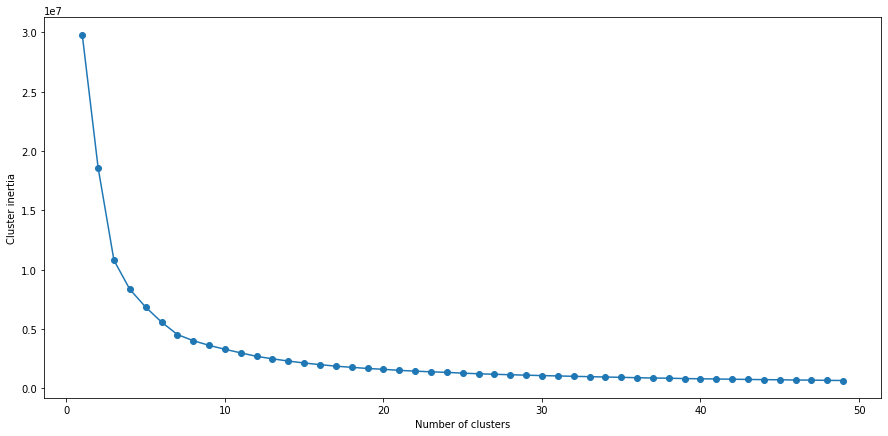

In [7]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Visualizing clusters

For n_clusters = 3 The average silhouette_score is : 0.4085589
For n_clusters = 4 The average silhouette_score is : 0.37168974
For n_clusters = 5 The average silhouette_score is : 0.345611
For n_clusters = 6 The average silhouette_score is : 0.3782565
For n_clusters = 7 The average silhouette_score is : 0.38649267
For n_clusters = 8 The average silhouette_score is : 0.37600556
For n_clusters = 9 The average silhouette_score is : 0.3718729
For n_clusters = 10 The average silhouette_score is : 0.36832747
For n_clusters = 11 The average silhouette_score is : 0.36239916
For n_clusters = 12 The average silhouette_score is : 0.36027515
For n_clusters = 13 The average silhouette_score is : 0.35923585
For n_clusters = 14 The average silhouette_score is : 0.36470026
For n_clusters = 15 The average silhouette_score is : 0.3668254
For n_clusters = 16 The average silhouette_score is : 0.37074718
For n_clusters = 17 The average silhouette_score is : 0.37289968
For n_clusters = 18 The average silhou

C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 23 The average silhouette_score is : 0.3670143


C:\Users\l-Larsovic-l\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 24 The average silhouette_score is : 0.36483756


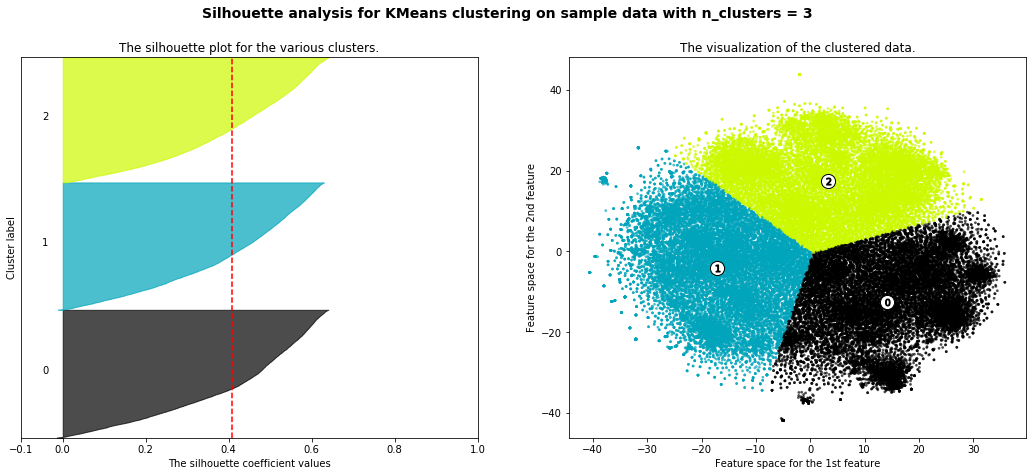

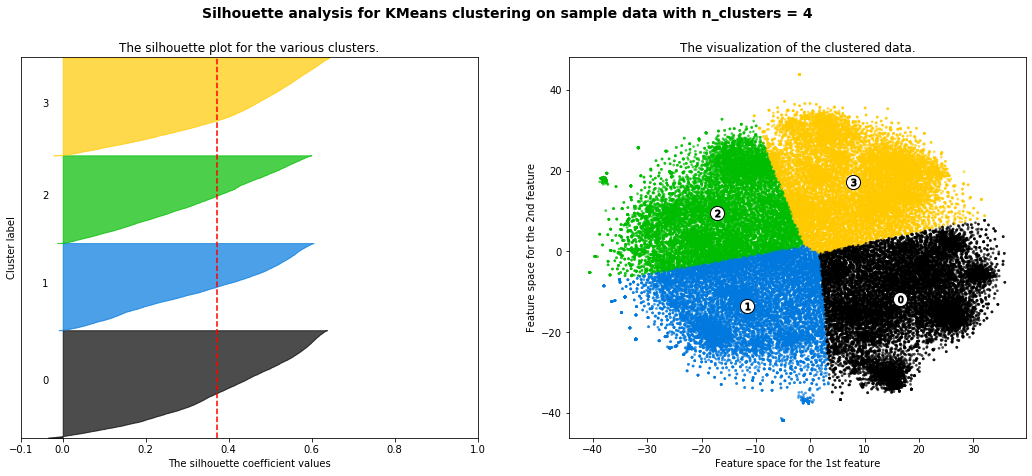

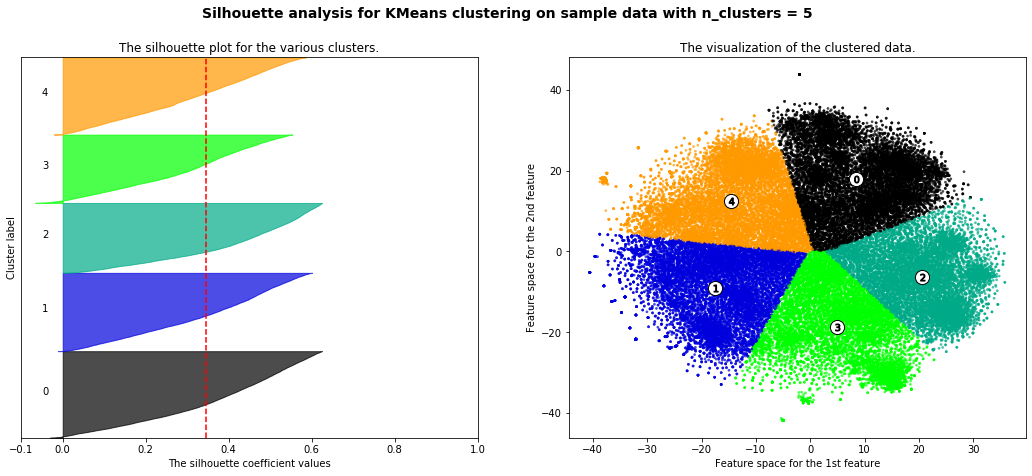

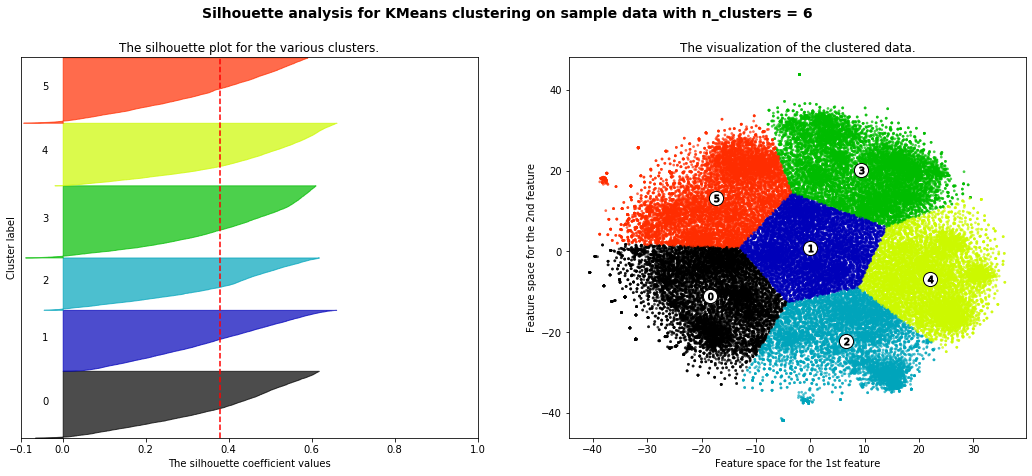

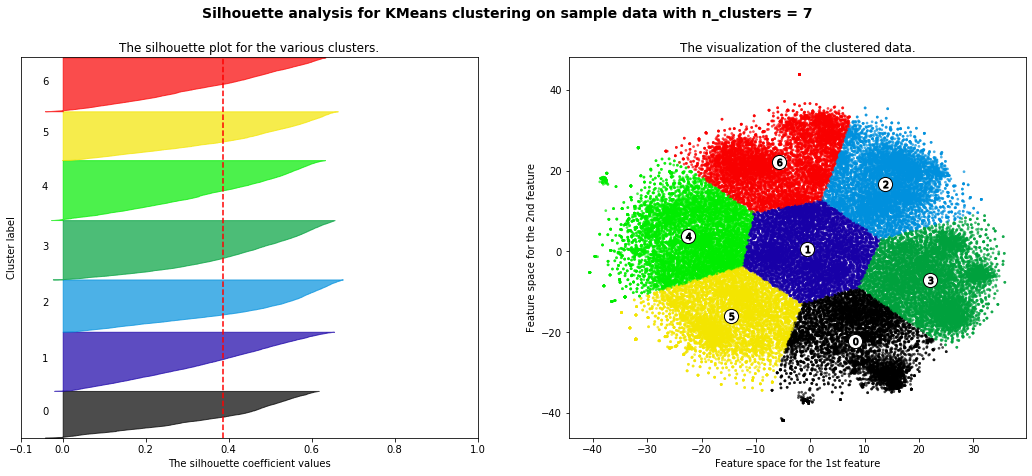

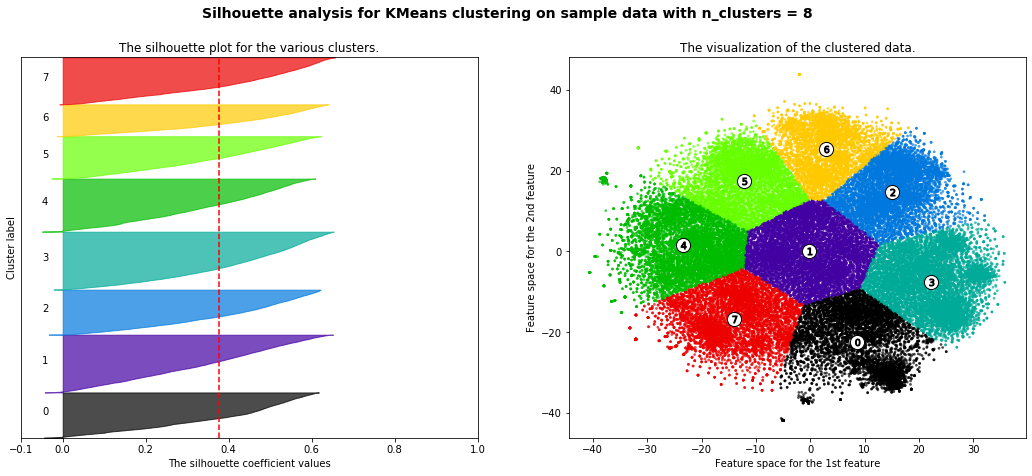

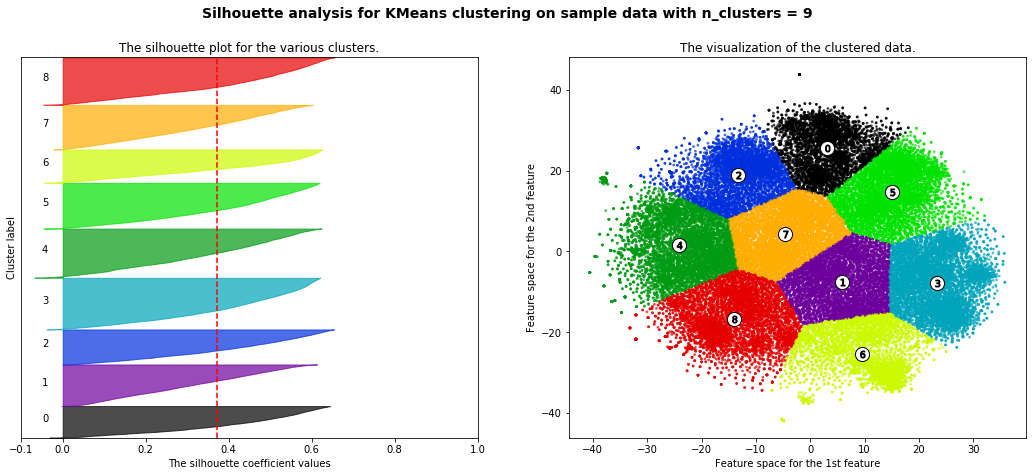

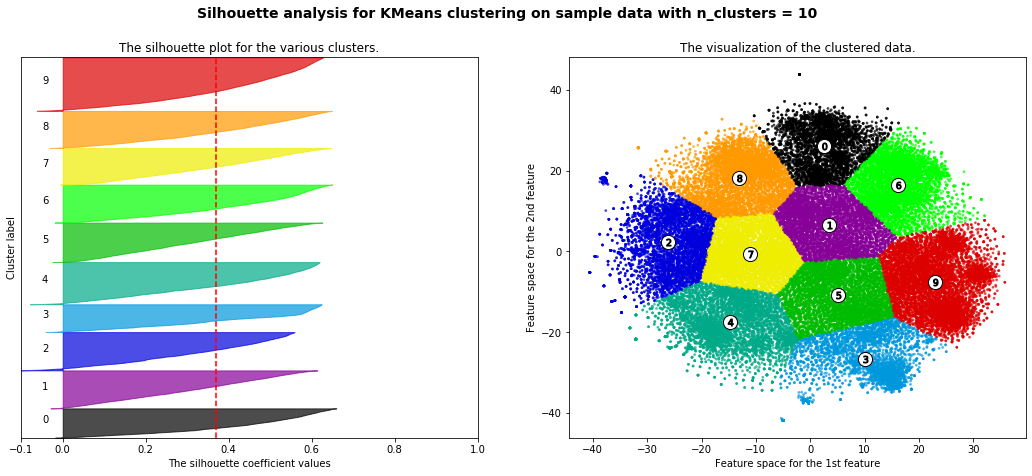

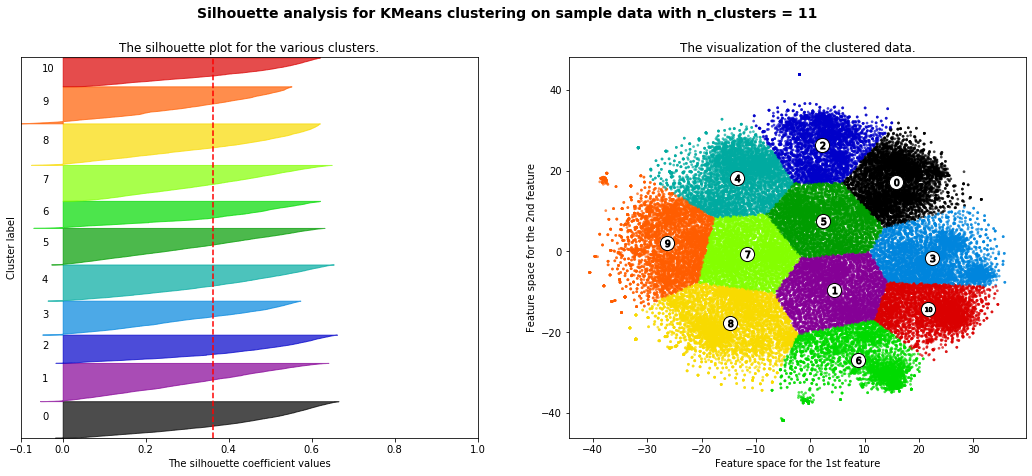

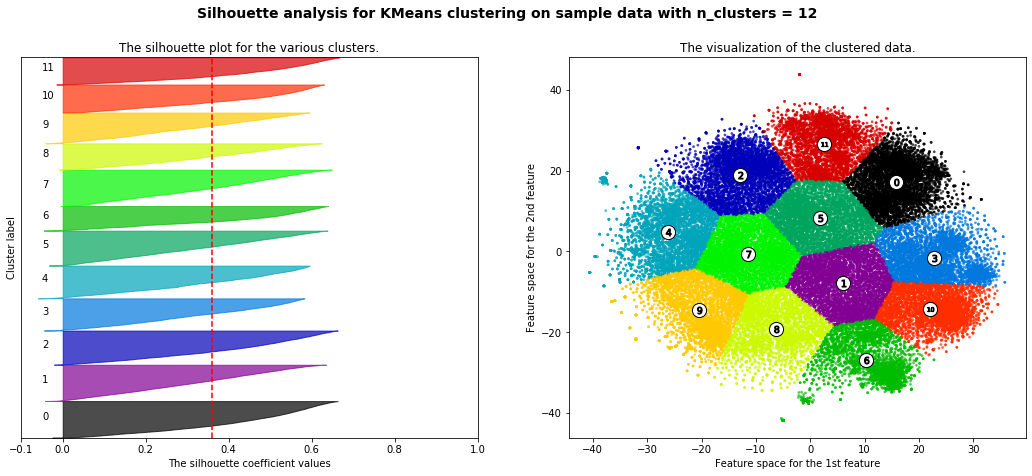

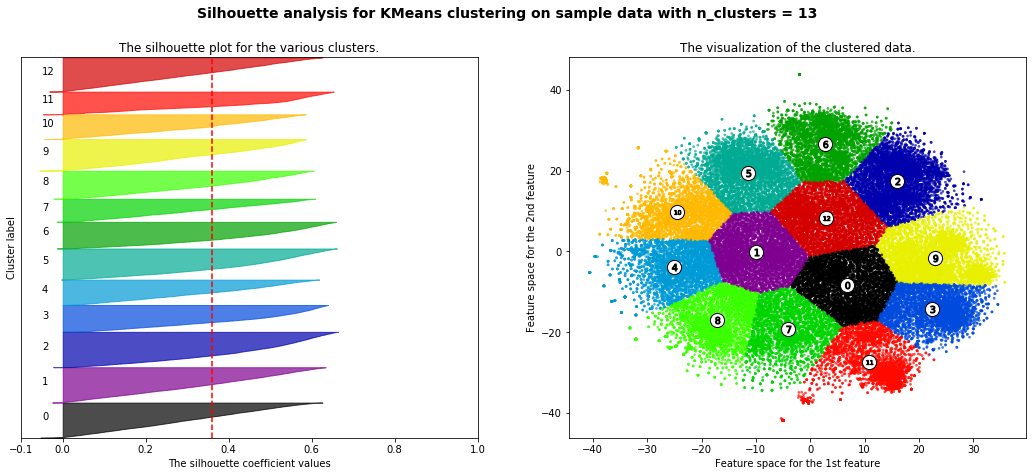

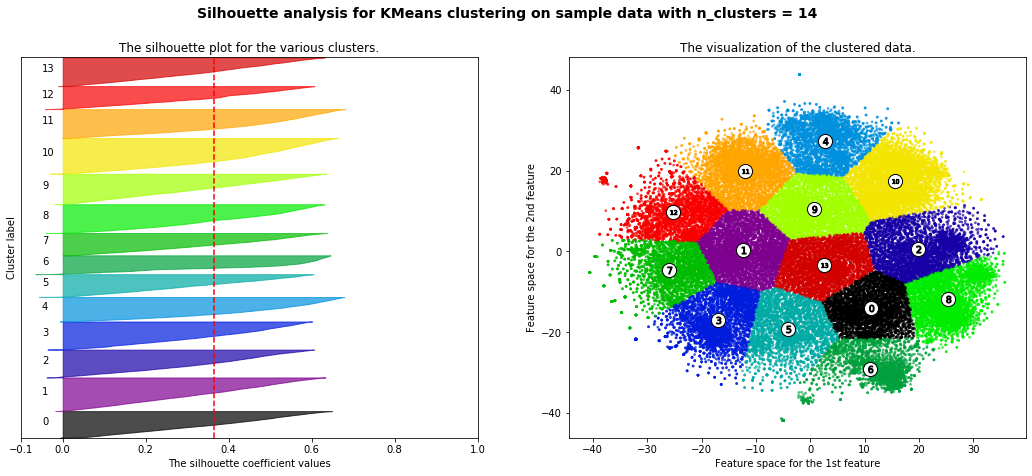

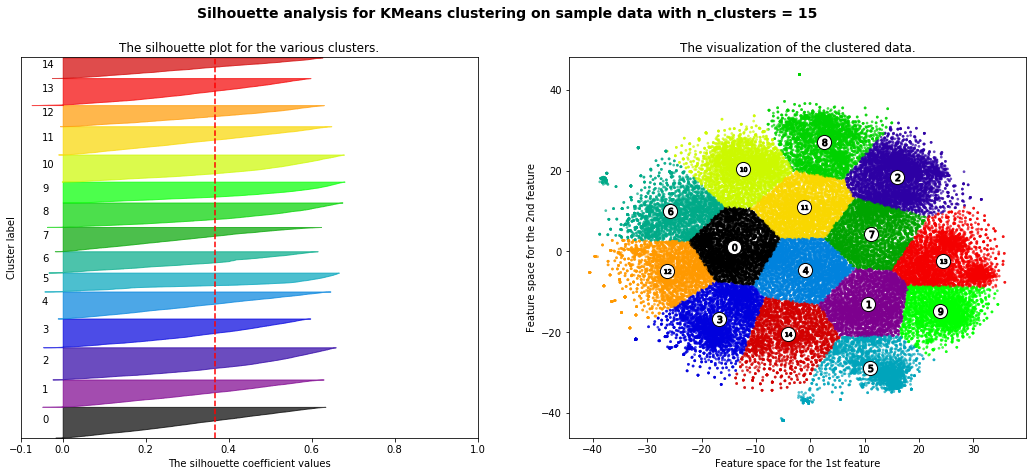

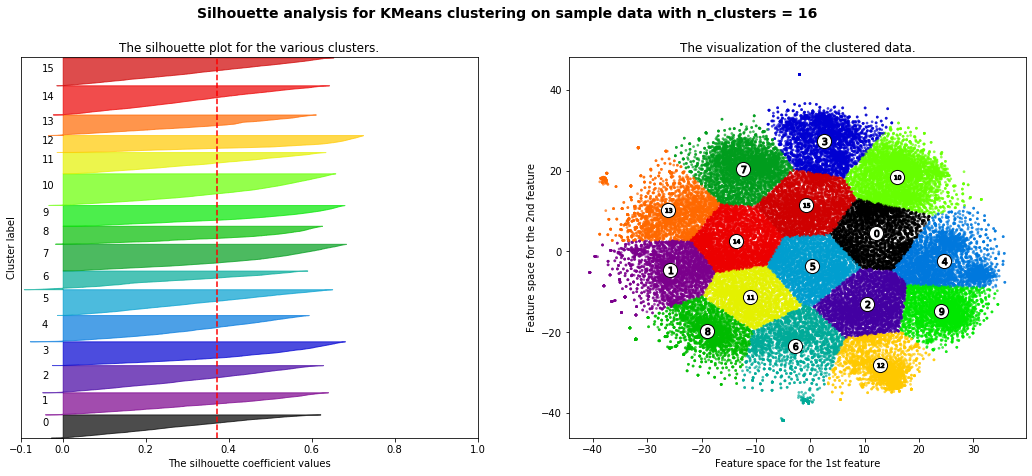

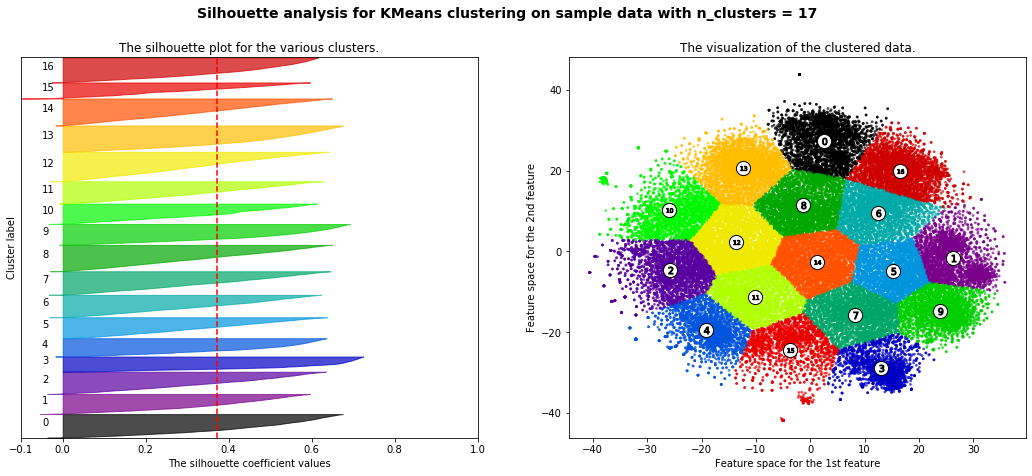

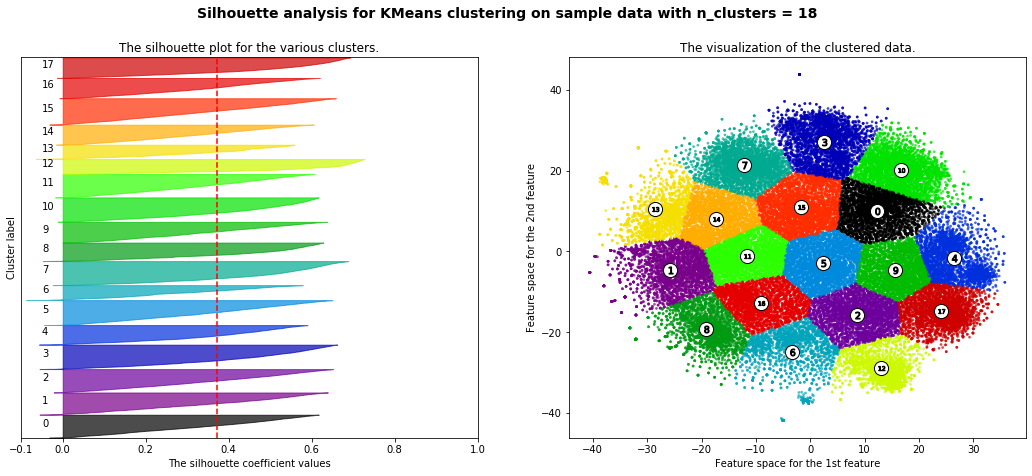

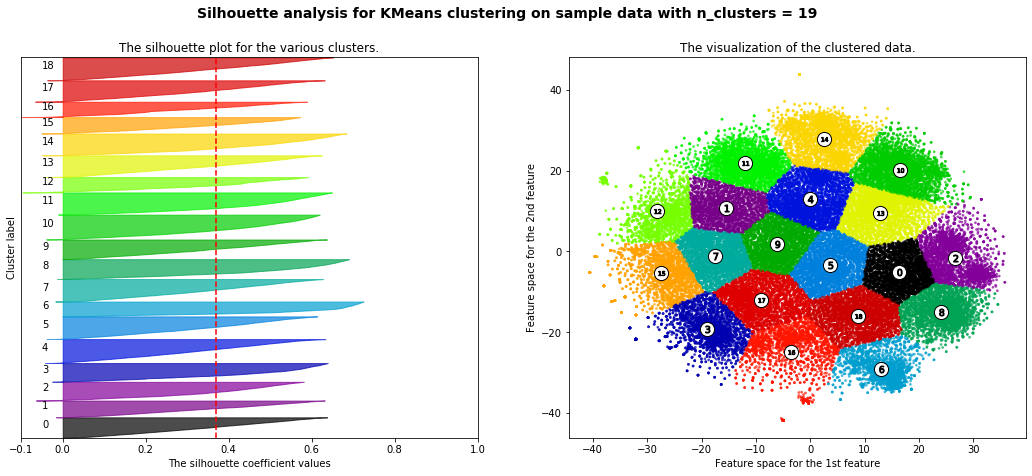

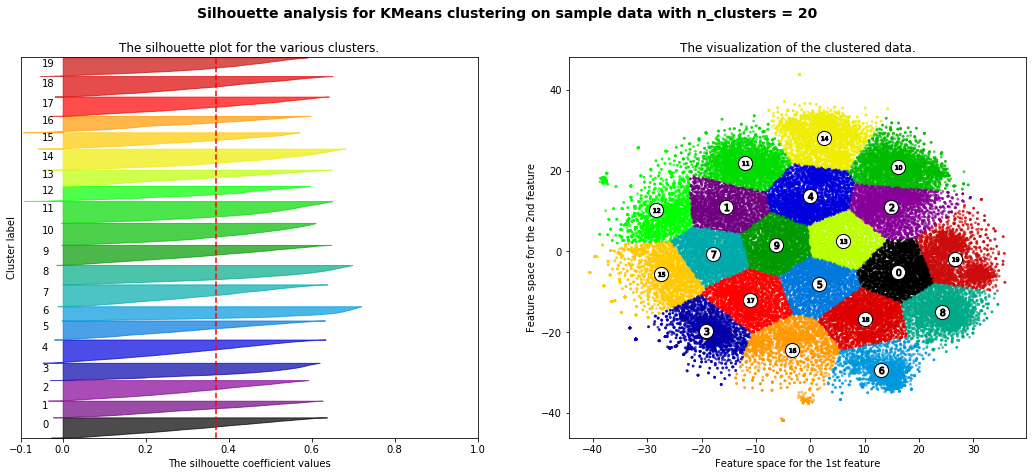

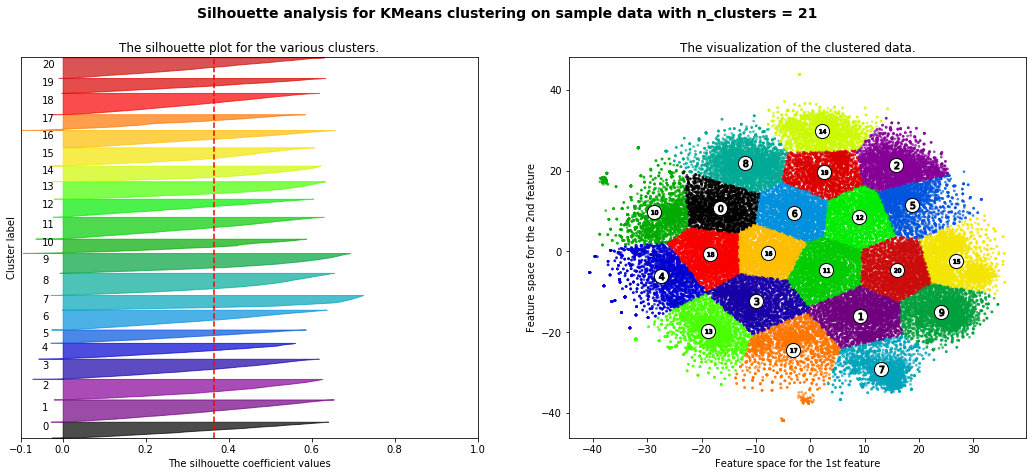

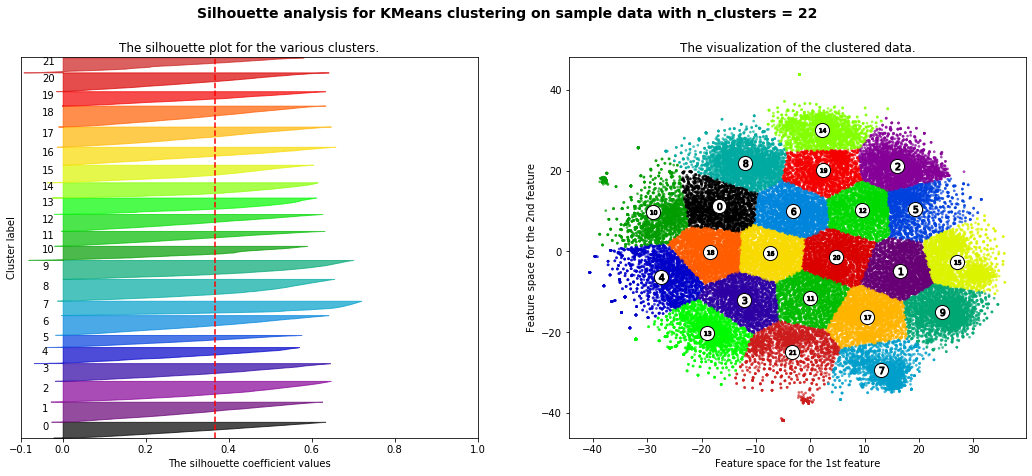

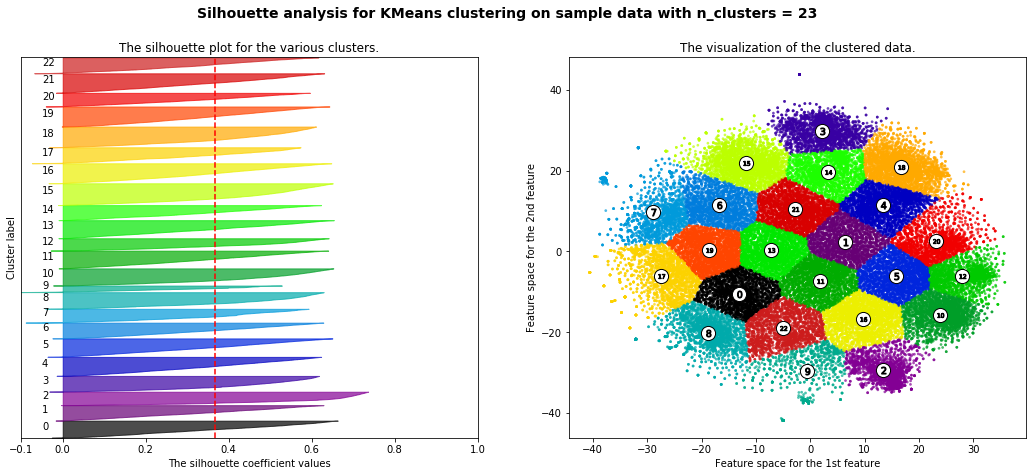

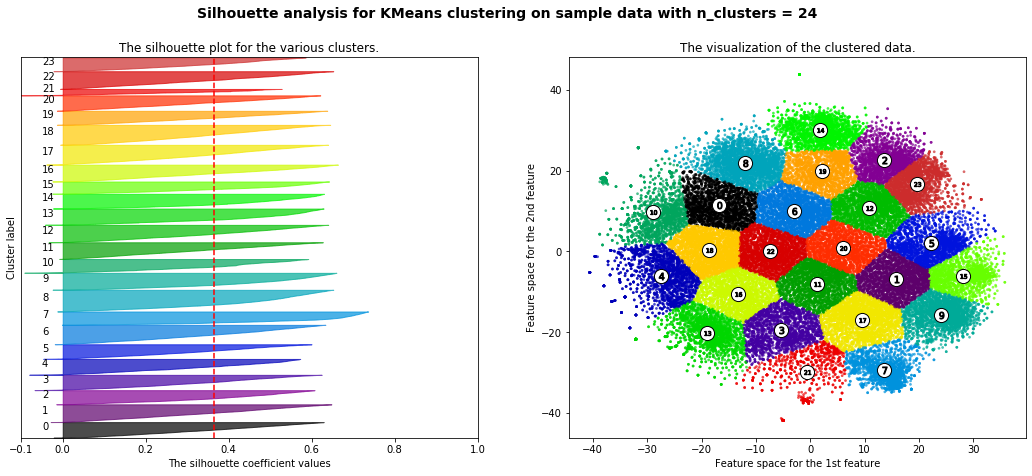

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(3,25):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


## Analyzing with narrative

In [33]:
number_clusters = 4
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

df_index = pd.DataFrame(indexes)

indici = []
for i in range(0,len(indexes)):
    indici.append(i)
df1 = df_index.set_index(pd.Index(indici))
df2 = df.set_index(pd.Index(indici))
df_result = pd.concat([df1,df2], axis = 1)
print(df_result)

       0  Row No Date received                  Product  \
0      3    6874      09/09/16              Payday loan   
1      0   10840      08/07/15            Consumer Loan   
2      3   12248      08/07/16            Consumer Loan   
3      3   17162      05/26/16            Consumer Loan   
4      0   17642      11/05/15            Consumer Loan   
...   ..     ...           ...                      ...   
58030  1  222826      09/21/16  Bank account or service   
58031  1  142174      03/05/16  Bank account or service   
58032  3   55888      01/23/17  Bank account or service   
58033  1  293505      09/27/16  Bank account or service   
58034  2  327087      09/28/15  Bank account or service   

                      Sub-product                                     Issue  \
0                            None  Charged fees or interest I didn't expect   
1                    Vehicle loan       Problems when you are unable to pay   
2                    Vehicle loan                Manag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\l-Larsovic-l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster number: 0
i recently refinanced with capital one from in i then got into a major car accident on which resulted in a total loss this was the worst scenario that could have happened my complaint branches from the lack of knowledge incorrect information repeatedly given to me by the agents in the total loss department of the capital one auto finance department i was sent the paperwork for a power of attorney prior to my accident and then right after the accident i called capital one to see if they still needed this information due to the fact the car was now in a total loss status and there would no longer be a loan for that particular car the agent i spoke with went to call over to a department and inform them of the total loss and returned to the call and stated not to worry about it they would not need any of the loan paperwork now that the car was totaled i later was on a way call with and the total loss agent who stated they were finalizing the title and that they had receiv

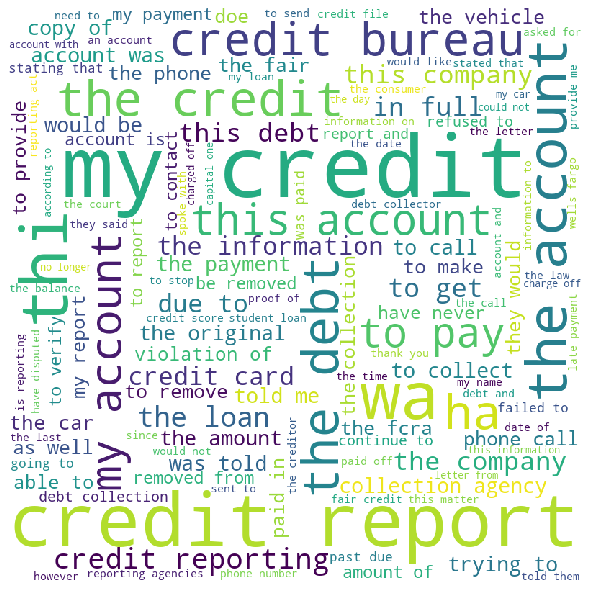

Cluster number: 1
dear i made a mobile deposit of a check of the amount of see attached copy the check is made to my older brother and was properly endorsed before it was deposited in my account at m t bank funds were made available into my account total i then proceeded to write a check for the deposit for my apartment for the amount of at am i received a call from the branch stating that the check was declined i went to the branch who then explained to me that the check was presented before the funds were available the branch then issued me a certified check in the amount of i was then on my way to the rental office when the bank teller who provided me with the check called and said that i needed to return the certified check and that her posted a hold on my account stating that she needed clarification as to where the check was from and the needed to hear he story about the check i called my brother who went with me to the branch not only did he take his id he took the check to show

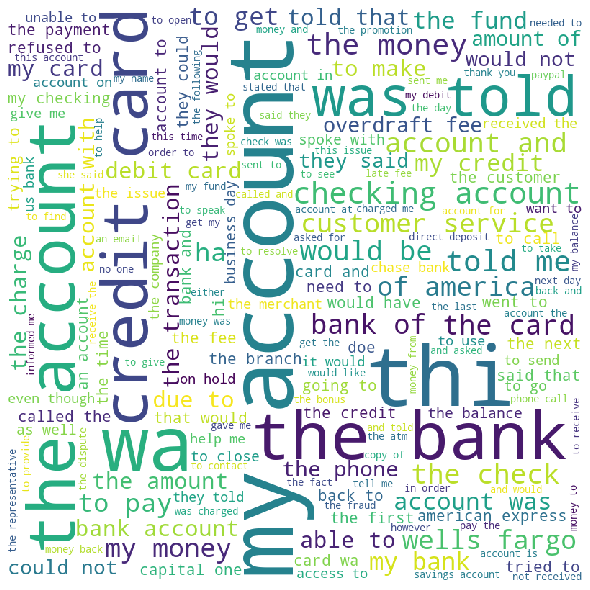

Cluster number: 2
i ve been having on going issues with my automobile lender condor capital my primary issue of concern is that the auto company took my loan off of my credit report while i was still making payments although i ve made monthly payments it always appeared that i carried a balance which in turn additional penalties and interest applied so regardless of my monthly payment i was always behind although i purchased my vehicle in for i still have a balance of over after four years there s something terribly wrong here also my car was repossessed this morning i have n t received a phone call an email a letter in the mail only to pay the bill which i disputed because i had issues with the payments posting incorrectly i can not understand how a company can operate under such pretenses 

i purchased two dresses from macy s totaling bill was due i returned both dresses on for full credit which out the balance and with enough time to be reflected on my next bill but when the next bi

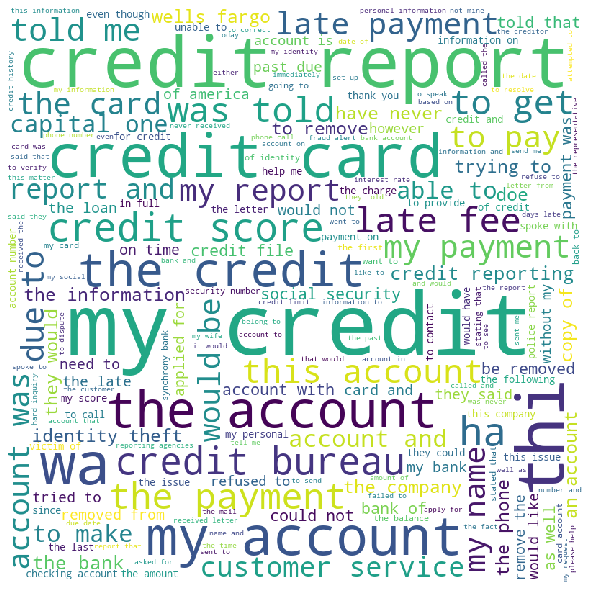

Cluster number: 3
i purchased a auto loan with gm financial my interest rate is almost and i have found out from other lenders that my auto is underwater i have tried several time to get my car refinance and no other lender will touch the loan i am being charged over more than what the vehicale is worth i keep attempting to get out of the loan however can not find a lender first of all back in i was told the rate was however when the final paperwork was done it was over this is preditory lending because i am women please send me someone that can help me i need help 

i got a loan from regional acceptance corporation address nc the loan was for and with an accumulating interest of that was in now they still want me to pay another to pay off for car which i brought i talk to them and gave an offer they refused and demanded that i pay or they want to reprocess the car and after they sold it i will still owe the differences i paid a total of for a loan of although it was not a fair deal bu

i have been trying to get fedloan to accept the fact that i am a student and therefore subject to an education deferment for two months now they lost the deferment paperwork i sent in and refused to respond to my queries with any personal replies instead all i received were copy and paste responses from various different people who obviously did n t read my emails no matter how hard i tried to get someone to actually read the emails i was sending no one would do so i would receive threats that i would be turned over for collection and be unable to get student loans but no help no actual response from a human and no one would get a manager involved despite my requests finally i received an email stating that they were notified that i am in school with an out of school date of now they are claiming that they do n t have the dates i am still being charged and receiving threats that i will be turned over for collection and denied future student loans 

i have private student loans with nav

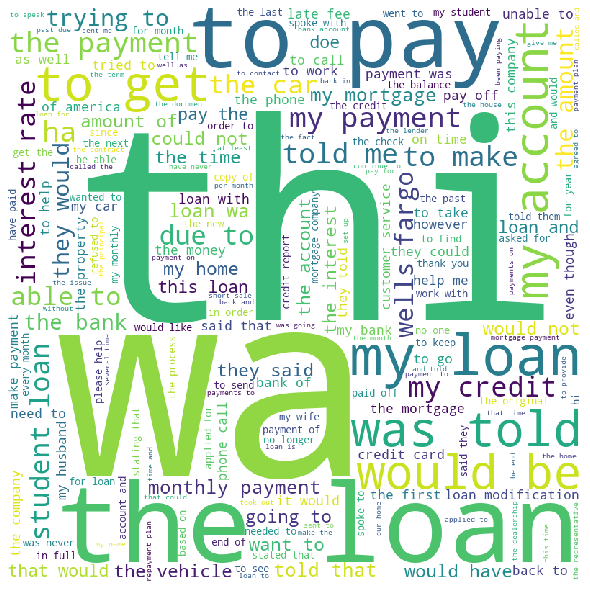

In [37]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,2000)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
